In [75]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [76]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [77]:
from citipy import citipy


In [78]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [79]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [80]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [81]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75e8cf4369c6729fa7ae4020673751a1


In [82]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [83]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | wasilla
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | manicore
Processing Record 8 of Set 1 | el balyana
City not found. Skipping...
Processing Record 9 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | jarjis
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | po

KeyboardInterrupt: 

In [84]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.66,80,75,20.71,AR,2022-06-16 23:17:25
1,Barrow,71.2906,-156.7887,46.42,76,75,6.91,US,2022-06-16 23:20:39
2,Hobart,-42.8794,147.3294,45.27,94,75,5.75,AU,2022-06-16 23:20:18
3,Wasilla,61.5814,-149.4394,71.65,50,0,8.05,US,2022-06-16 23:16:48
4,Hamilton,39.1834,-84.5333,91.35,65,20,17.27,US,2022-06-16 23:15:50
5,Manicore,-5.8092,-61.3003,76.95,100,0,0.00,BR,2022-06-16 23:21:06
6,Punta Arenas,-53.1500,-70.9167,32.11,69,20,17.27,CL,2022-06-16 23:17:27
7,Carnarvon,-24.8667,113.6333,70.88,81,83,9.22,AU,2022-06-16 23:21:07
8,Mahebourg,-20.4081,57.7000,72.25,94,40,3.44,MU,2022-06-16 23:19:43
9,Kodiak,57.7900,-152.4072,53.11,82,100,6.91,US,2022-06-16 23:21:08


In [85]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df  = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-16 23:17:25,-54.8000,-68.3000,31.66,80,75,20.71
1,Barrow,US,2022-06-16 23:20:39,71.2906,-156.7887,46.42,76,75,6.91
2,Hobart,AU,2022-06-16 23:20:18,-42.8794,147.3294,45.27,94,75,5.75
3,Wasilla,US,2022-06-16 23:16:48,61.5814,-149.4394,71.65,50,0,8.05
4,Hamilton,US,2022-06-16 23:15:50,39.1834,-84.5333,91.35,65,20,17.27
5,Manicore,BR,2022-06-16 23:21:06,-5.8092,-61.3003,76.95,100,0,0.00
6,Punta Arenas,CL,2022-06-16 23:17:27,-53.1500,-70.9167,32.11,69,20,17.27
7,Carnarvon,AU,2022-06-16 23:21:07,-24.8667,113.6333,70.88,81,83,9.22
8,Mahebourg,MU,2022-06-16 23:19:43,-20.4081,57.7000,72.25,94,40,3.44
9,Kodiak,US,2022-06-16 23:21:08,57.7900,-152.4072,53.11,82,100,6.91


In [86]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [87]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

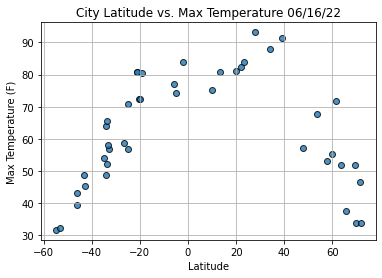

In [88]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

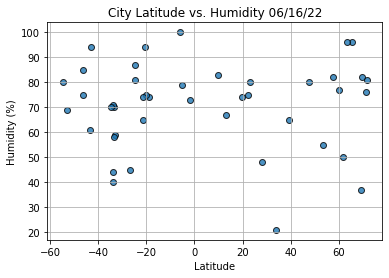

In [89]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

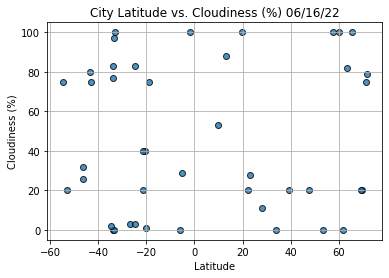

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

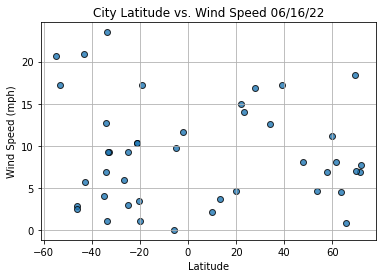

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [92]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [93]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-06-16 23:16:12
Lat                       69.7008
Lng                      170.3133
Max Temp                    33.82
Humidity                       82
Cloudiness                     20
Wind Speed                   6.96
Name: 13, dtype: object

In [94]:
city_data_df["Lat"] >= 0

0     False
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14    False
15    False
16     True
17     True
18    False
19    False
20     True
21     True
22    False
23    False
24     True
25    False
26    False
27     True
28     True
29    False
30    False
31    False
32     True
33    False
34    False
35     True
36    False
37     True
38    False
39     True
40     True
41     True
42    False
Name: Lat, dtype: bool

In [95]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barrow,US,2022-06-16 23:20:39,71.2906,-156.7887,46.42,76,75,6.91
3,Wasilla,US,2022-06-16 23:16:48,61.5814,-149.4394,71.65,50,0,8.05
4,Hamilton,US,2022-06-16 23:15:50,39.1834,-84.5333,91.35,65,20,17.27
9,Kodiak,US,2022-06-16 23:21:08,57.7900,-152.4072,53.11,82,100,6.91
10,Hilo,US,2022-06-16 23:17:51,19.7297,-155.0900,81.25,74,100,4.61


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


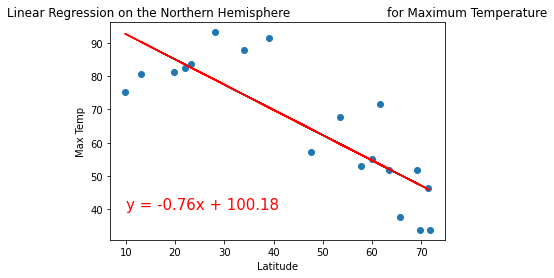

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

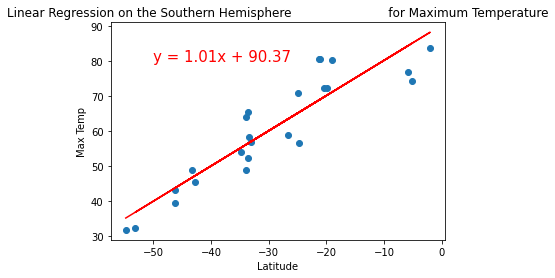

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

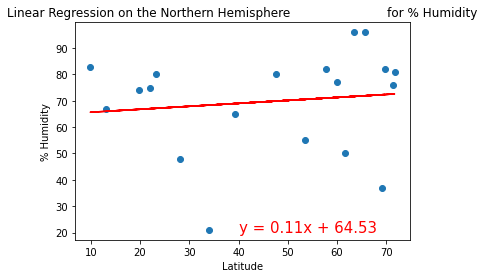

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

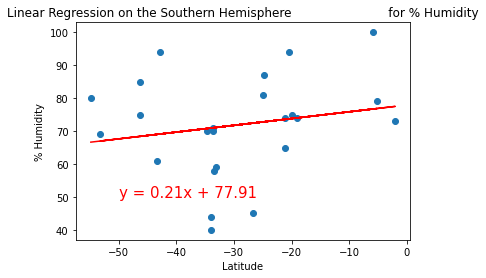

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,50))

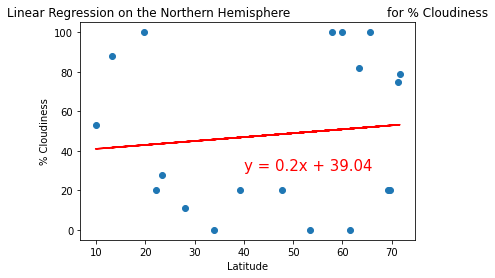

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

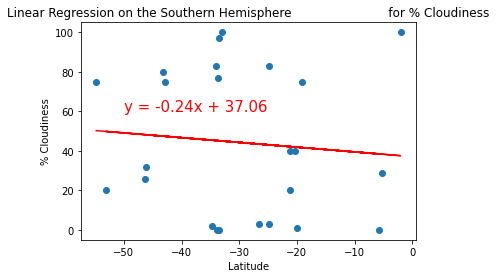

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


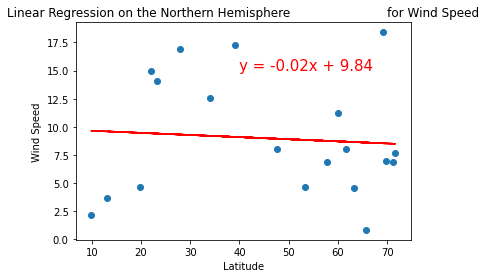

In [152]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

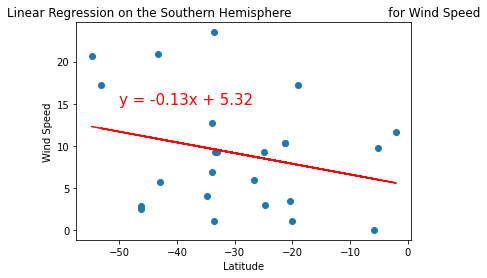

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))